<a href="https://colab.research.google.com/github/Voisan/ML-study/blob/main/week_01_ml_intro/Homework/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

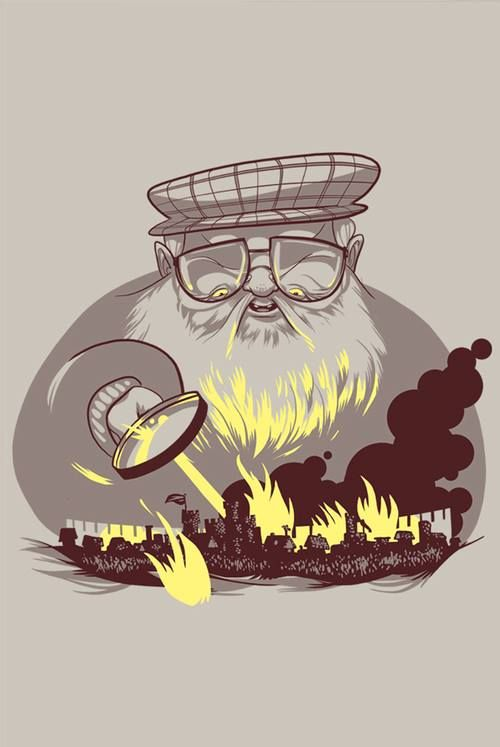

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 93.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 94.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [62]:
data = pd.read_csv("/content/game_of_thrones_train.csv",index_col='S.No')
data_test=pd.read_csv("/content/game_of_thrones_test.csv",index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [64]:
data.sample(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
934,Beth Cassel,NaN,0,Northmen,289.0,NaN,NaN,NaN,House Cassel,NaN,...,NaN,NaN,NaN,NaN,0,0,16.0,0,0.070234,1
917,Artos Stark,NaN,1,Northmen,NaN,NaN,NaN,NaN,House Stark,Lysara Karstark,...,NaN,NaN,NaN,1.0,1,0,NaN,0,0.103679,1
1508,Ghost of High Heart,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.086957,1
1190,Cleos Frey,Ser,1,NaN,258.0,NaN,NaN,NaN,House Frey,Jeyne Darry,...,NaN,NaN,NaN,1.0,1,1,41.0,0,0.247492,0
624,Jate,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.000000,0


In [65]:
#тот код создаёт новый признак, который означает, выжил ли персонаж до определённого возраста (305 лет).
data['survived_to_305'] = data['dateOfBirth'] + data['age']
data['survived_to_305'] = data['survived_to_305'].apply(lambda x: 'Survived' if x >= 305 else "NotSurvived")
data['survived_to_305'].fillna('Unknown', inplace=True)
data_test['survived_to_305'] = data_test['dateOfBirth'] + data_test['age']
data_test['survived_to_305'] = data_test['survived_to_305'].apply(lambda x: 'Survived' if x >= 305 else "NotSurvived")
data_test['survived_to_305'].fillna('Unknown', inplace=True)

<ipython-input-65-235ea3e9be7d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['survived_to_305'].fillna('Unknown', inplace=True)
<ipython-input-65-235ea3e9be7d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [66]:
columns_to_drop = [
    'mother',
    'father',
    'heir',
    'spouse',
    'isAliveMother',
    'isAliveFather',
    'isAliveHeir',
    'isAliveSpouse'
]

# Удаление столбцов,где слишком много пропусков:
data.drop(columns=columns_to_drop, inplace=True)
data_test.drop(columns=columns_to_drop, inplace=True)

In [67]:
#Заполним пропуски
data['age'].fillna(data['age'].median(), inplace=True)
data['dateOfBirth'].fillna(data['dateOfBirth'].median(), inplace=True)
data['house'].fillna('Unknown', inplace=True)
data['culture'].fillna('Unknown', inplace=True)
data['title'].fillna('Unknown', inplace=True)
data_test['age'].fillna(data_test['age'].median(), inplace=True)
data_test['dateOfBirth'].fillna(data_test['dateOfBirth'].median(), inplace=True)
data_test['house'].fillna('Unknown', inplace=True)
data_test['culture'].fillna('Unknown', inplace=True)
data_test['title'].fillna('Unknown', inplace=True)

<ipython-input-67-49f368aa160d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-67-49f368aa160d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [68]:
data['isPopular'] = (data['popularity'] >= 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
#чтобы не возникала кореляяция между признаками,уберем первообразные столбцы
data.drop(columns=['popularity','numDeadRelations'],inplace=True)

In [69]:
data_test['isPopular'] = (data_test['popularity'] >= 0.5).astype(int)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)
#чтобы не возникала кореляяция между признаками,уберем первообразные столбцы
data_test.drop(columns=['popularity','numDeadRelations'],inplace=True)

In [70]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
data['culture'] = data['culture'].apply(
    lambda x: next((k for k, v in cult.items() if x.lower() in [i.lower() for i in v]), 'Unknown')
)
data_test['culture'] = data_test['culture'].apply(
    lambda x: next((k for k, v in cult.items() if x.lower() in [i.lower() for i in v]), 'Unknown')
)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [71]:
#Рассмотрим корреляюцию среди числовых признаков
correlation = data.corr(numeric_only=True)
print(correlation['isAlive'])

male                -0.148290
dateOfBirth          0.332522
book1               -0.112468
book2               -0.055998
book3                0.018427
book4                0.284014
book5                0.032531
isMarried           -0.049381
isNoble             -0.060572
age                 -0.179331
isAlive              1.000000
isPopular           -0.118673
boolDeadRelations   -0.178177
Name: isAlive, dtype: float64


Отсюда видим,что book дают слабую корреляцию,так что создадим новый признак,с общим количеством этих признаков.

In [72]:
data['book_appearances'] = data[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)
data.drop(columns=['book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)
data_test['book_appearances'] = data_test[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)
data_test.drop(columns=['book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [73]:
data['isAlive'].head(5)

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1


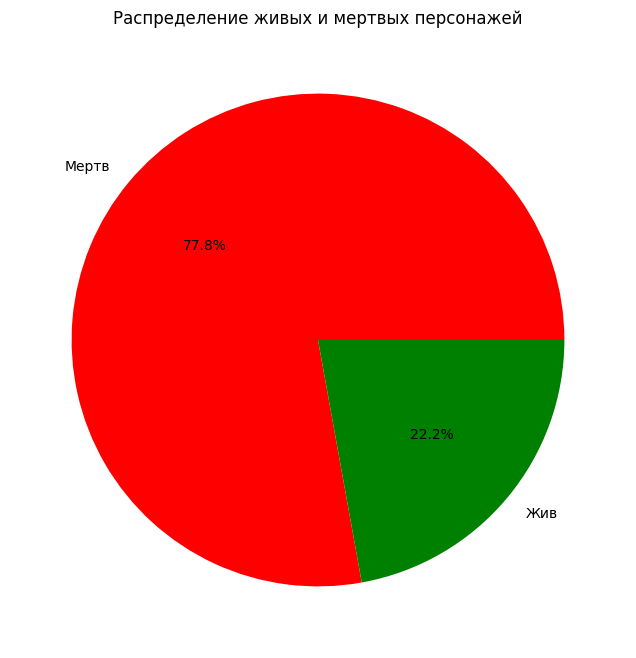

In [74]:
alive_counts = data['isAlive'].value_counts()

plt.figure(figsize=(8, 8))
alive_counts.plot.pie(labels=['Мертв', 'Жив'], autopct='%1.1f%%', colors=['red','green'])
plt.title('Распределение живых и мертвых персонажей')
plt.axis('off')
plt.show()

Целевая переменная является категориальным признаком.По графику можно заметить,что у нас дисбаланс,скорее всего,оптимальным выбором модели будет RandomForest.


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [75]:
#Столбец name не несет никакой ценности
data.drop(columns="name",inplace=True)
data_test.drop(columns="name",inplace=True)

In [76]:
data.isna().sum()

,0
title,0
male,0
culture,0
dateOfBirth,0
house,0
isMarried,0
isNoble,0
age,0
isAlive,0
survived_to_305,0


In [77]:
# Кодирование признаков
data = pd.get_dummies(data, columns=["title", "culture", "house","survived_to_305"], drop_first=True, dtype=int)
data_test = pd.get_dummies(data_test, columns=["title", "culture", "house","survived_to_305"], drop_first=True, dtype=int)

# Выравнивание столбцов
all_columns = set(list(data.columns) + list(data_test.columns))
data = data.reindex(columns=all_columns, fill_value=0)
data_test = data_test.reindex(columns=all_columns, fill_value=0)


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [78]:
correlation = data.corr()
correlation['isAlive']

,isAlive
title_Harrenhal,-0.047088
house_Antler Men,0.013526
title_King in the North,0.040681
house_House Vyrwel,0.013526
house_House Greenhill,0.013526
...,...
culture_Summer Islands,0.033184
house_House Ball,-0.047516
title_Castle Lychester,0.013526
house_The Citadel,0.013526


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [79]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=52,stratify=y
)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [82]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [83]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [84]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [85]:
# Шаг 1. создание модели
RDF = RandomForestClassifier(random_state=42)


# Шаг 2. обучение модели
RDF.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_predrdf=RDF.predict(X_test)

In [86]:
base_model = DecisionTreeClassifier(max_depth=1)

# Обучение модели AdaBoost
model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [87]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [88]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [89]:
#Посчитаем для RandomForestClassifier
y_predrdf=RDF.predict(X_test)


accuracy = accuracy_score(y_test, y_predrdf)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8120


In [90]:
#Посчитаем для DecisionTreeClassifier
y_predDTC = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predDTC)
print(f"Accuracy : {accuracy}")

Accuracy : 0.8183760683760684


Лучший результат показал DCT,будем использовать его дальше для подсчета финального файла.



Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [91]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.21MB/s]


In [92]:
#Столбец "isAlive" появился тогда,когда я подгонял под один и тот же порядок признаки в data и data_test
#Хоть он и есть,но он просто состоит из нулей :)
y_pred_sub = model.predict(data_test.drop('isAlive', axis=1))

In [93]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')
submission['isAlive'] = y_pred_sub

Как сохранить измененный Pandas DataFrame в csv файл:

In [94]:
submission.to_csv("/content/new_submission.csv", index=False)